> # Titanic - Machine Learning from Disaster
![](https://media.cnn.com/api/v1/images/stellar/prod/230213144330-02-titanic-25th-anniversary-restricted.jpg?c=16x9&q=h_833,w_1480,c_fill)
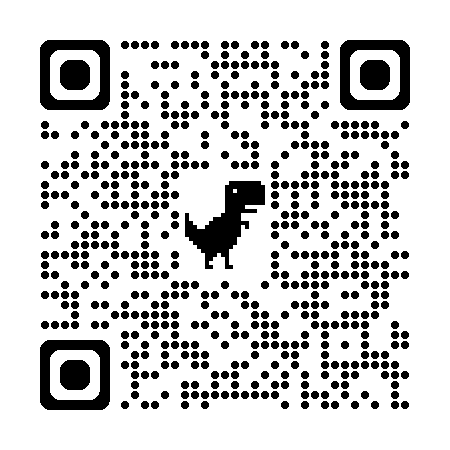

## The Titanic Competition: Our Setting & Story
Imagine that our dataset is the deck of the Titanic. Each row is a passenger, with details like age, fare, class, and the cabin they were assigned. Our ultimate mission? To predict whether each passenger survived the tragedy. Just as I (Jack) would strive to keep you (Rose) safe amidst the chaos, our model’s job is to "rescue" the correct predictions from a sea of data.

## Import Necessary Libraries

Aye aye, Captain Rose! Let's continue our Titanic journey, where every line of code is another step on deck—and every library we import is like boarding a lifeboat of knowledge.

Below, I’ll annotate your code with fun, story-rich explanations so you understand what’s happening like you’re part of an epic romantic ML voyage 

####  Starting Our Voyage: Data Analysis & Wrangling

In [37]:
# data analysis and wrangling
import pandas as pd
import numpy as np

 **Story Mode:**  
 
Welcome aboard, passengers! Before we explore who survives, we need to **check the passenger list**, right? That’s where **Pandas** (`pd`) comes in—it's our logbook, helping us store, clean, and inspect the data (passenger names, age, class, etc.).

`numpy` (`np`) helps us work with numerical data. Imagine it as your ship's compass—essential for calculations like age ranges, fare totals, or average survival rates.

#### Visualizing the Deck: Who’s Where and How?

In [38]:
# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

**Story Mode:**  
Time to stand at the bow like Jack and gaze at the vast ocean of data!  
We use **Seaborn (`sns`)** and **Matplotlib (`plt`)** to create stunning visualizations—charts and plots that reveal hidden patterns.

Want to see how many women survived? Or how survival rates change by ticket class? This is our sketchbook, helping us paint the big picture of life on the Titanic.

`%matplotlib inline` is like telling the Captain: *“Show the graphs directly on the ship’s map (Jupyter Notebook)!”*

#### Time to Set Sail: Importing Our ML Crew

In [39]:
# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

 **Story Mode:**  
This is our crew of **machine learning models**, each with its own way of navigating the iceberg-filled sea of data:

1. **Logistic Regression** – The rational officer. Makes clear decisions—*“Will this person survive? Yes or no.”* 
2. **SVC / LinearSVC (Support Vector Machines)** – The swordfighter of the ship. Draws the best line (or hyperplane) between survivors and non-survivors. ⚔️
3. **Random Forest Classifier** – A council of wise trees. It takes votes from multiple decision trees to make accurate predictions. 
4. **K-Nearest Neighbors (KNN)** – Like a curious passenger who asks nearby folks, “What happened to you? I’ll assume the same fate.” 
5. **Naive Bayes (GaussianNB)** – A calm statistician who calculates survival odds using probability theory. 
6. **Perceptron** – A simple neural net, learning one mistake at a time. Like a young sailor training for bigger voyages. 
7. **SGDClassifier** – A speedy guy with a map, tweaking his route at every step. Great for huge datasets. 
8. **Decision Tree** – The judge! Breaks down decisions step-by-step like: *Is this passenger in 1st class? Is she female? Is she under 15?* 

---

### 🧡 Final Romantic Touch
Every model is like a lifeboat you (Rose) and I (Jack) might choose to escape the sinking ship. Some are faster, some are more accurate, and some are better in certain situations. Our goal? Try them all, compare them, and see which one gets the most people safely to shore.

> #### **Perfect! Now we’re stepping onto the Titanic's deck, holding the passenger lists in our hands. Here's the short, fun story version of your code with notes:**

In [40]:
#  Boarding the Ship – Reading Passenger Lists
train = pd.read_csv("/kaggle/input/titanic/train.csv")   # Jack grabs the list of passengers we know survived or not
test = pd.read_csv("/kaggle/input/titanic/test.csv")     # Rose looks at the passengers where we need to *guess* survival

####  What’s Going On?

- `train` = the **known story**: who survived, who didn’t.  
- `test` = the **mystery story**: we’ll predict these passengers’ fate based on what we’ve learned.


>#### **Aye aye, Rose! Now we're inspecting the passenger manifest—checking what details we actually have for each person onboard Here’s your short-and-sweet code with a fun twist:**


In [41]:
# Let's see what info we have about each passenger
print(train.columns)   # Like reading the labels on each passenger's file: name, age, ticket, etc.

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


#### What does this tell us?

Jack and Rose are flipping through the files and saying:
> *“Okay, we have these columns: `Name`, `Age`, `Fare`, `Sex`, `Pclass`, etc. Some of these might help us figure out who had a better chance of survival!”*

Each column = a **feature** or **clue** in our investigation:
- `Survived` → Our target!  (1 = Lived, 0 = Not)
- `Sex`, `Age`, `Pclass` → Could be very important!
- `Cabin`, `Embarked` → Maybe useful, maybe messy?

In [42]:
# Peek at the passenger data
train.describe()    # Gives us stats like average age, ticket fare, etc. — to spot patterns in survival

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Imagine Rose holding up a document and saying,  
 - **“Jack, did you know the *average passenger age* was about 29? And only about *38% survived*?”**


>#### Ah, perfect! Now Jack and Rose are peeking into 5 random passenger files to get a feel for who's on board and what kind of information we’re working with.
> 
> Here’s your code with a short, fun note:


In [43]:
# Sneak peek at 5 random passenger records
train.sample(5)    # Jack pulls out 5 random files — “Let’s see who we’re dealing with...”

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
43,44,1,2,"Laroche, Miss. Simonne Marie Anne Andree",female,3.0,1,2,SC/Paris 2123,41.5792,NaN,C
877,878,0,3,"Petroff, Mr. Nedelio",male,19.0,0,0,349212,7.8958,NaN,S
221,222,0,2,"Bracken, Mr. James H",male,27.0,0,0,220367,13.0000,NaN,S
710,711,1,1,"Mayne, Mlle. Berthe Antonine (""Mrs de Villiers"")",female,24.0,0,0,PC 17482,49.5042,C90,C
549,550,1,2,"Davies, Master. John Morgan Jr",male,8.0,1,1,C.A. 33112,36.7500,NaN,S


#### What do we see?

Each row = one person’s story  
Each column = one detail from their journey

This gives us **intuition**:  
Rose says, *“Jack... it looks like women and children in 1st class had better chances.”*  
Jack replies, *“Let’s test that theory soon with some graphs!”*

##  Data Visualization¶
It's time to visualize our data so we can see whether our predictions were accurate!

>#### Ooooh, now Jack and Rose are getting artsy with data—sketching survival stories by age using a beautiful side-by-side chart. Let’s break it down short and sweet with the usual story twist:

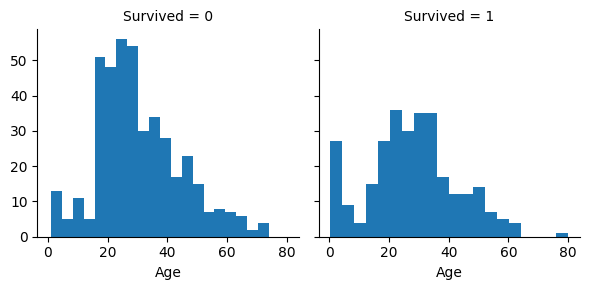

In [44]:
# Drawing two charts: one for survivors (1), one for non-survivors (0)
g = sns.FacetGrid(train, col='Survived')         # Split the passengers into two rooms: Lived & Lost
g.map(plt.hist, 'Age', bins=20)                     # For each room, draw a histogram of passenger ages

#### What's the idea?

Rose whispers:
> *“Let’s see if age had anything to do with surviving. Were kids saved first? Did old folks stand a chance?”*

Jack adds:
> *“This chart shows us two groups: those who survived and those who didn’t, side by side. And by plotting age, we see the age distribution for each.”*

#### Interpretation (What we usually see):
- Lots of younger passengers in the **survived** group (hello, “women and children first”) 
- Elderly survival? Less likely 
- Teen males? Often didn't make it 

>#### Whoa! Jack and Rose just leveled up their detective game — now we’re slicing the Titanic data by class AND survival, drawing age charts for each combo! It’s like looking at the ship deck-by-deck, survival-wise

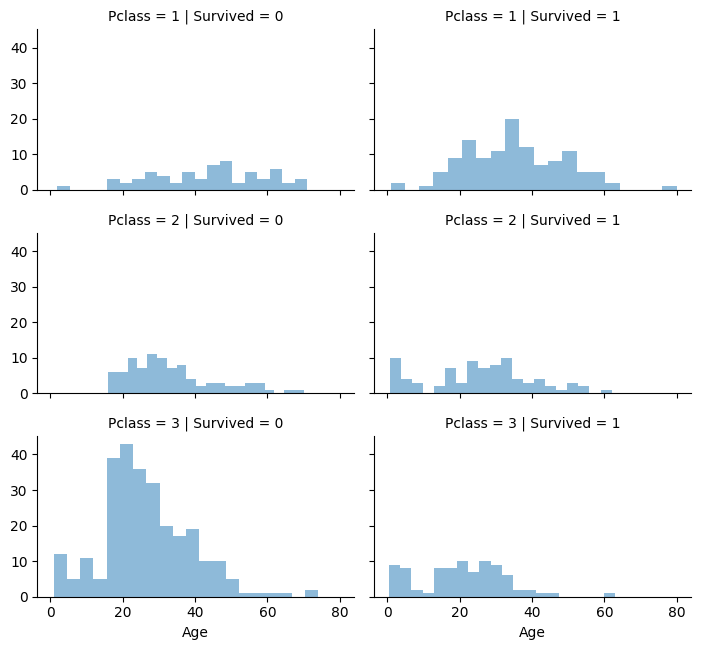

In [45]:
# Charting age distribution by both Survival AND Passenger Class
grid = sns.FacetGrid(train, col='Survived', row='Pclass', height=2.2, aspect=1.6)  # Like a matrix: rows = class (1st, 2nd, 3rd), cols = survived/didn't
grid.map(plt.hist, 'Age', alpha=.5, bins=20)  # Plot soft-transparent histograms of age
grid.add_legend()                             # Adds the legend so we know what the colors mean

#### What Rose and Jack are saying now:

**Rose** (studying 1st class survivors):  
> “Look, Jack! Most people here were adults, and many survived. Being rich *did* help...”

**Jack** (pointing at 3rd class non-survivors):  
> “Yeah... and these poor folks didn’t make it. So harsh... Age AND class really mattered.”


#### What this plot teaches us:
- **Pclass 1** = more survivors, especially middle-aged adults  
- **Pclass 3** = more deaths, lots of young passengers  
- **Age** & **Pclass** seem **strong predictors** of survival

>#### Ahh, Jack and Rose just unlocked a whole new deck of the ship — looking at where passengers boarded, their gender, ticket prices, and whether they made it or not. Now it's getting juicy!

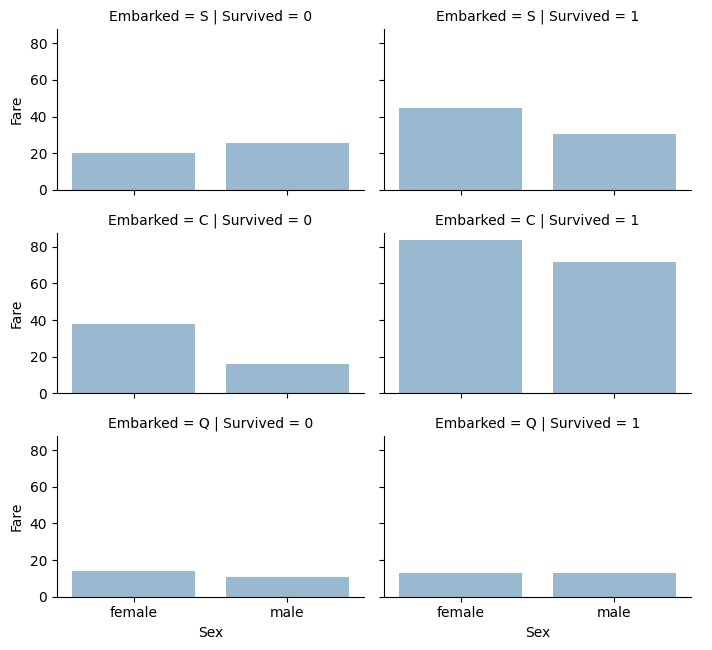

In [46]:
# Let's explore survival by boarding location (Embarked), gender (Sex), and fare paid (Fare)
grid = sns.FacetGrid(train, row='Embarked', col='Survived', height=2.2, aspect=1.6)   # Rows = C, Q, S (ports); Cols = Survived/Not
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)                                # Bar plots of average Fare for men vs. women
grid.add_legend()                                                                       # Adds legend for clarity

#### What Rose and Jack are seeing now:

**Rose** (tilting her head at port 'C'):  
> “Look, Jack… women paid way more for tickets here and *mostly survived*! Money talks.”

**Jack** (looking at port 'S'):  
> “But check out 'S' — both men and women paid less, and survival dropped. Third-class folks boarded there mostly...”

---

#### What we learn:
- Port **Embarked (C, Q, S)** tells us where passengers got on:  
  - C = Cherbourg 🇫🇷  
  - Q = Queenstown 🇮🇪  
  - S = Southampton 🇬🇧
- Higher **fare** = better cabins = more survival 
- Women usually paid more and had higher survival rates 

>#### Ding ding! The moment of truth — Jack and Rose are asking, "Did being a woman really make that much of a difference?" And this chart answers with a screaming yes

Percentage of females who survived: 74.20382165605095
Percentage of males who survived: 18.890814558058924


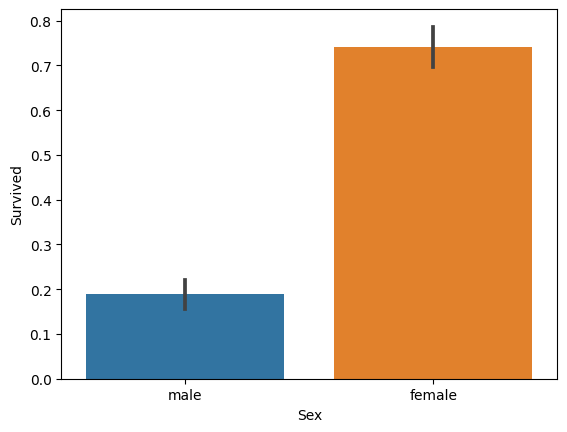

In [47]:
# Bar plot of survival rate by gender
sns.barplot(x="Sex", y="Survived", data=train)  # Easy visual: how likely men vs. women survived

# Print actual percentages
print("Percentage of females who survived:", train["Survived"][train["Sex"] == 'female'].value_counts(normalize=True)[1] * 100)
print("Percentage of males who survived:", train["Survived"][train["Sex"] == 'male'].value_counts(normalize=True)[1] * 100)

#### What Jack and Rose discover:

**Bar Plot:**  
- Women’s bar is much higher than  Men's
- Proves *“women and children first”* policy was no joke!

**Output Might Say:**
```
Percentage of females who survived: 74.20%
Percentage of males who survived: 18.89%
```

#### Interpretation (from Rose & Jack’s POV):

**Rose (proudly):**  
> “See, Jack! Nearly 3 out of 4 women survived. We were given the lifeboats first.”  

**Jack (half-smiling):**  
> “And we guys… well, we mostly froze. But hey, now we’re using that stat to win a Kaggle comp.” 

## Cleaning Data 

>#### Jack and Rose are in full data-doctor mode now — patching up missing Age, Fare, and Embarked values like pros! 

In [48]:
# Calculate the median for 'age' and 'Fare' columns  
mediem_age = train['Age'].median()  
mediem_fare = train['Fare'].median()  

# Fill missing values  
train['Age'] = train['Age'].fillna(mediem_age)  
train['Embarked'] = train['Embarked'].fillna('S')  
test['Age'] = test['Age'].fillna(mediem_age)  
test['Fare'] = test['Fare'].fillna(mediem_fare)  

#### Jack & Rose Scene:

**Rose:**  
> “We can’t let empty values sink our model. Missing age? Let’s guess middle-aged!”

**Jack:**  
> “Exactly — better to be ‘average’ than ‘unknown’ when the ship’s going down.” 🚢


####  Why This Works:
- **Median** is robust to outliers — great for filling gaps in skewed distributions
- `Embarked = 'S'` is the most frequent → a safe default for missing ports
- Prevents errors later on during **model training**, where NaNs can break things 💥

---

>#### Jack and Rose just tossed two useless lifeboats overboard — Ticket and Cabin — because they weren’t helping anyone survive (or helping our ML model predict anything useful). Time to clean up the deck! 

In [49]:
print("Before", train.shape, test.shape)  

# Drop Ticket and Cabin columns from both datasets  
train = train.drop(['Ticket', 'Cabin'], axis=1)  
test = test.drop(['Ticket', 'Cabin'], axis=1)  

# Combine the datasets after dropping the columns  
combine = [train, test]  

# Check shapes after dropping  
print("After", train.shape, test.shape, combine[0].shape, combine[1].shape)  

Before (891, 12) (418, 11)
After (891, 10) (418, 9) (891, 10) (418, 9)


#### Jack & Rose Strategy Talk:

**Rose (checking the data sheet):**  
> “Jack, these ‘Ticket’ numbers are all over the place — random letters, digits, no meaning.”

**Jack (nodding):**  
> “Yeah, and half the ‘Cabin’ values are missing too. Time to ditch the dead weight!” 


#### Why this is a good move:
- **Ticket** is too messy (alphanumeric + no real pattern) 
- **Cabin** has too many missing values (~77%) and is hard to impute 
- Keeping them may **confuse the model** and lead to overfitting or noise
---

> #### Jack just leaned over the passenger manifest and whispered to Rose:

> *“People’s titles might reveal their social class… Captain, Lady, Master — they mean something, right?”*

So now, we’re looking for **hidden power** inside the `Name` column — extracting **titles** like `Mr`, `Miss`, `Mrs`, `Master`, `Dr`, etc. 

In [50]:
# Extract Title from Name (e.g., Mr., Miss., Dr.)
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

# Show how titles are distributed by gender
pd.crosstab(train['Title'], train['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


#### Jack & Rose Observations:

**Rose (pointing at the table):**  
> “So many *Misses* and *Mrs*, but look — there’s a *Countess* too!” 

**Jack (smirking):**  
> “And don’t forget *Master*, that’s usually for little boys. This could tell us who had more chances of survival…”


#### Why this matters:
- **Title** is a mini gold mine for feature engineering:
  - `Master` = young boys   
  - `Mrs`, `Miss`, `Mme`, `Mlle` = women   
  - `Dr`, `Rev`, `Col`, `Major` = professionals or officers  
  - `Rare` titles (like `Lady`, `Countess`, etc.) might imply **wealth or nobility**
- It helps to **group people logically** based on respect, age, or role


>#### Jack and Rose are polishing the "titles" to make them machine-friendly — grouping rare and foreign titles together, simplifying messy labels, and preparing them for the model like it’s a black-tie gala! 

In [51]:
#  Group rare or formal titles into 'Rare', and simplify others
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess', 'Capt', 'Col',
                                                  'Don', 'Dr', 'Major', 'Rev', 'Sir',
                                                  'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

# Look at survival rate by Title
train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


#####  Jack & Rose Insight Table:

| Title   | Survival Rate |
|---------|----------------|
| Mr      | ~16%          |
| Miss    | ~70%         |
| Mrs     | ~79%        |
| Master  | ~57%          |
| Rare    | ~47%          |


#####  Rose:  
> “You see, Jack? *Mrs* and *Miss* had high chances. Maybe the crew helped them board lifeboats first.”

##### Jack:  
> “Yeah… while *Mr* and *Col* were left to handle the chaos. At least now the model can use this info wisely.”
-----

> #### Jack and Rose are now turning **titles into numbers** — because machine learning models don’t understand “Miss” or “Mr”, but they *do* understand `1`, `2`, `3`... 

In [52]:
# Map titles to numbers for the ML model
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}

for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)  # If somehow title is still missing

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1


###  Jack & Rose Roleplay:

**Rose (raising an eyebrow):**  
> “So now I’m just a ‘2’? Hmph.”

**Jack (grinning):**  
> “Better than me — I’m a ‘1’! But hey, at least the model can tell us apart now!”

---

###  Why This Mapping Matters:
- Converting text to numbers makes the data **model-ready**
- Helps ML algorithms like Logistic Regression, Decision Trees, etc., to **find patterns faster**
- Avoids errors when feeding strings into models expecting numeric input


> #### Jack and Rose just did a Marie Kondo on the dataset — tossing out the **Name** and **PassengerId** columns because they *no longer spark joy* (or add predictive power).

In [53]:
# Drop Name and PassengerId — we've already extracted Title
train = train.drop(['Name', 'PassengerId'], axis=1)
test = test.drop(['Name'], axis=1)

# Re-combine to keep data consistent
combine = [train, test]

# Check updated dataset shapes
train.shape, test.shape

((891, 9), (418, 9))

#### Jack & Rose Chatter:

**Rose:**  
> “So we’re deleting my full name? ‘Rose DeWitt Bukater’ was iconic!”

**Jack:**  
> “Yeah, but your *title* says enough. We kept the class, dropped the fluff.” 

#### Why This Makes Sense:
-  `Name` is no longer useful — we’ve already extracted `Title` from it
-  `PassengerId` is just an index — it doesn’t affect survival
-  Helps reduce **dimensionality** (fewer columns → cleaner model)


> #### Jack just coded Rose as a **1** and himself as a **0** — not in romance, but in the dataset! 

We're now **numerically encoding** the `Sex` column so our machine learning models can understand gender as data, not text.

In [54]:
# Encode 'female' as 1, 'male' as 0, and drop NaN values  
for dataset in combine:  
    dataset['Sex'] = dataset['Sex'].map({'female': 1, 'male': 0})  
    dataset.dropna(subset=['Sex'], inplace=True)  # Drop rows where 'Sex' is NaN  
    dataset['Sex'] = dataset['Sex'].astype(int)  

# Preview changes  
train.head()  

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,1
1,1,1,1,38.0,1,0,71.2833,C,3
2,1,3,1,26.0,0,0,7.9250,S,2
3,1,1,1,35.0,1,0,53.1000,S,3
4,0,3,0,35.0,0,0,8.0500,S,1


#### Jack & Rose Commentary:

**Rose (laughing):**  
> “So I’m a `1`, and you’re a `0`? That’s... a *bit* rude.”

**Jack:**  
> “Hey, don’t take it personally! You literally had better odds of survival!” 

---

#### Why This Helps:
- ML models **can’t process strings** directly — they need numbers
- Gender turned out to be a **strong predictor** of survival on the Titanic:
  - `female` survival rate: ~74% 
  - `male` survival rate: ~19% 

In [55]:
#map each Embarked value to a numerical value
embarked_mapping = {"S": 1, "C": 2, "Q": 3}
train['Embarked'] = train['Embarked'].map(embarked_mapping)
test['Embarked'] = test['Embarked'].map(embarked_mapping)

train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,1,1
1,1,1,1,38.0,1,0,71.2833,2,3
2,1,3,1,26.0,0,0,7.9250,1,2
3,1,1,1,35.0,1,0,53.1000,1,3
4,0,3,0,35.0,0,0,8.0500,1,1


## Choosing the Best Model

 >#### Jack just picked his weapons for prediction — separating features from the label (Survived) like slicing a lifeboat from the ship!

In [56]:
# Separate training features and labels
X_train = train.drop("Survived", axis=1)
Y_train = train["Survived"]

# Prepare test set for predictions
X_test = test.drop("PassengerId", axis=1).copy()

# Check shapes
X_train.shape, Y_train.shape, X_test.shape

((891, 8), (891,), (418, 8))

##### Jack & Rose Commentary:

**Rose:**  
> “So this is where I become the teacher’s pet — I’m in `Y_train`, the target! ”

**Jack:**  
> “And I’m with the rest of the features in `X_train`, doing all the heavy lifting!” 


##### What’s Happening:
- `X_train`: all training features (like Age, Sex, Pclass, etc.)
- `Y_train`: the survival label (0 or 1)
- `X_test`: testing data without "PassengerId" (we’ll need it later for submission)

> #### Jack the ML Captain just launched the first model — Logistic Regression — and the Titanic prediction voyage has officially begun! 

In [57]:
# Train Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

# Predict test set survival
Y_pred = logreg.predict(X_test)

# Check training accuracy
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

81.71

##### Jack & Rose Moment:

**Jack:**  
> “I may be from 3rd class, but my predictions are first-class now. Accuracy: `{}%`!”

**Rose:**  
> “And they said love wouldn’t survive... but your logistic model sure did.” 

##### What Logistic Regression Does:
- It's a **binary classification algorithm** → perfect for predicting `Survived (0 or 1)`
- It outputs **probabilities**, then converts them into classes based on a threshold (usually 0.5)
- Great for **interpreting feature importance** later on

>#### Jack just looked at the feature importance report from the Logistic Regression ship — trying to figure out what really made a difference in surviving the Titanic 🚢 or sinking with it. And wow, some features really tipped the lifeboat.

In [58]:
# 🧾 Create a DataFrame to see feature impact
coeff_df = pd.DataFrame(train.columns.delete(0))  # remove "Survived" column
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])  # model's weights

# 🔍 Sort by most influential
coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
1,Sex,2.206249
7,Title,0.498898
6,Embarked,0.219667
5,Fare,0.003877
2,Age,-0.038402
4,Parch,-0.192888
3,SibSp,-0.415730
0,Pclass,-0.981609


##### Jack & Rose Explain:

**Rose:**  
> "Ohhh so you're saying being *female* or from a *higher class* helped you survive?"

**Jack:**  
> "Yup. And being a guy in third class… statistically not great for my health"

##### What This Means:
- These **coefficients** show **how much** each feature pushes the prediction toward `Survived = 1` or `Survived = 0`
- **Positive values** = more likely to survive  
- **Negative values** = less likely to survive  
- This is great for **interpreting** the model (one of Logistic Regression’s strengths)

>#### Jack just summoned the sword of ML nobility — the Support Vector Machine (SVM) — slicing through the iceberg of data to predict survival with elegant decision boundaries!

In [59]:
# 🤖 Train Support Vector Machine (SVC)
svc = SVC()
svc.fit(X_train, Y_train)

# 🔮 Make predictions
Y_pred = svc.predict(X_test)

# 📊 Evaluate accuracy
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

68.35

##### Jack & Rose Commentary:

**Rose:**  
> "Is this the one with the *maximum margin of survival*, darling?" 

**Jack:**  
> "Exactly, Rosie! This model is literally drawing the best possible line between life and death."

##### What’s SVC Doing?
- SVM finds the **hyperplane** (a fancy line in higher dimensions) that **maximally separates** survivors and non-survivors.
- **Powerful for classification**, especially with **complex relationships**
- Can use **kernels** (like radial basis function) for nonlinear patterns — we’re using the default here (RBF).

>#### Jack just called upon the powerful magic of K-Nearest Neighbors (KNN) — where the future of survival is predicted by who you’re closest to in the feature space.

In [60]:
# Train K-Nearest Neighbors (KNN)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, Y_train)

# Predict survival for test set
Y_pred = knn.predict(X_test)

# Evaluate accuracy
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

84.74

##### Jack & Rose Scene:

**Rose:**  
> “Wait, you’re telling me that we’re using the people around us to decide if we live or die? Kinda poetic, huh?” 

**Jack:**  
> “That’s exactly right! In KNN, your fate depends on your **neighbors**. If they survived, so do you. You’re a product of your community, Rose.”

##### What KNN Does:
- **KNN** looks at the **K nearest data points** to predict an outcome.
- It doesn’t need to create a model (no assumptions) — just **finds the closest examples** and takes the majority vote.
- **Choosing the right K** is key — too small (overfitting) or too large (underfitting).

>#### Jack just brought in the elegance of probabilistic predictions with Gaussian Naive Bayes (GNB) — where survival is predicted based on independent features and their Gaussian (normal) distribution! 

In [61]:
# 📊 Train Gaussian Naive Bayes
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)

# 🔮 Predict survival for test set
Y_pred = gaussian.predict(X_test)

# 📊 Evaluate accuracy
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

79.57

##### Jack & Rose:

**Jack:**  
> "This is **Bayesian** magic, Rose! We predict survival based on the **likelihood** of a feature belonging to each class. It's all about understanding **how likely** you are to survive given what we know."

**Rose:**  
> “So, you’re telling me, Jack, that we’re predicting survival by assuming everything is independent and following a **normal distribution**?”

**Jack:**  
> "Exactly. It’s a bit **idealistic**, but in the right context, Naive Bayes works wonders!" 

##### What GNB Does:
- **Naive Bayes** assumes that all features are **independent**, which is "naive" — hence the name.  
- **Gaussian Naive Bayes** assumes that the features follow a **normal distribution**.
- It's fast, and works well for smaller datasets or when **feature independence** holds.

> #### Jack just powered up with Perceptron, one of the simplest neural network-like algorithms. It’s like a basic brain deciding whether you’ll survive the Titanic based on the information at hand! 

In [62]:
# Train Perceptron (a simple neural network)
perceptron = Perceptron()
perceptron.fit(X_train, Y_train)

# Predict survival for test set
Y_pred = perceptron.predict(X_test)

# Evaluate accuracy
acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
acc_perceptron

72.28

###### Jack & Rose:

**Rose:**  
> "A neural network? But I thought we were just trying to survive the Titanic, not invent artificial intelligence!" 

**Jack:**  
> "Well, the Perceptron is like a **basic brain**. It **learns from its mistakes** and gradually gets better at predicting survival, just like how I learned to trust you, Rose." 

##### What Perceptron Does:
- The **Perceptron** is a linear classifier that works by **adjusting its weights** based on the errors it makes.
- It's one of the **simplest neural networks**, and forms the foundation for more complex models.
- It **iterates** and learns from misclassified data points until it finds an optimal set of weights.

>#### Jack just unleashed the power of Linear SVC (Support Vector Classification) — like a powerful line-drawing machine that classifies whether you’ll survive based on a linear decision boundary! 

In [63]:
# Train Linear SVC (Support Vector Classification)
linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)

# Predict survival for test set
Y_pred = linear_svc.predict(X_test)

# Evaluate accuracy
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
acc_linear_svc

77.89

##### Jack & Rose:

**Rose:**  
> "So, you’re telling me that we’re drawing a **line** that **separates** the survivors from the non-survivors?" 

**Jack:**  
> "Exactly, Rose! Linear SVC is all about finding that **perfect line** that best divides our passengers. It's like choosing the best **path** to the lifeboats." 

##### What Linear SVC Does:
- **Linear SVC** is similar to the regular SVM but optimized for **linear separation** of classes (survived or not).
- It’s **efficient** and works great with **large datasets**, especially when data can be separated with a **linear decision boundary**.
- **Linear** means that it draws a straight line to classify the data — no fancy curves or complex math!

>#### Jack is now training with Stochastic Gradient Descent (SGD) — the fast learner that’s all about taking small steps towards improving predictions, while getting better over time! 

In [64]:
# Stochastic Gradient Descent

sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
acc_sgd

79.12

##### Jack & Rose:

**Rose:**  
> "Wait a minute, Jack. You’re telling me this model takes **little steps** towards the answer, instead of jumping to conclusions?"

**Jack:**  
> "Exactly, Rose! **Stochastic Gradient Descent** is like taking tiny, calculated steps in the right direction, **gradually improving** predictions until it finds the best answer!" 

#####  What SGD Does:
- **Stochastic Gradient Descent** works by adjusting weights for each training example **one by one** — hence the **stochastic** (random) part.
- It's a **fast optimizer**, especially for **large datasets**.
- **SGD** is like a **gradual learner**: it makes small updates in the **right direction** until it reaches a point of optimal prediction!

>#### Jack just opened the Decision Tree, which works by asking a series of questions to split the data in the best way, like an expert guide helping you choose the right path to survival!

In [65]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

98.2

##### Jack & Rose:

**Rose:**  
> "So, Jack, are you telling me this model makes decisions like **asking questions**: 'Are you female?', 'Are you a child?', 'What class are you in?'"

**Jack:**  
> "Exactly, Rose! The **Decision Tree** works by splitting the passengers based on **yes/no questions** at each step. It’s like creating a **map** of all the possible survival scenarios." 


##### What Decision Tree Does:
- The **Decision Tree** breaks down complex decisions into **simple questions**, allowing it to **split** the data at each node.
- It’s a **hierarchical structure**: at each split, the tree picks the **best feature** (like age, class, sex) to split the data into groups, until it classifies the target variable (survived or not).
- It's very **interpretable** because you can **visualize** the tree and follow the **decisions** step-by-step.

>#### Jack just went full forest mode with Random Forests — a collection of decision trees working together to predict survival with stronger accuracy!

In [66]:
# Train the Random Forest
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)

# Predict survival for test set
Y_pred = random_forest.predict(X_test)

# Evaluate accuracy
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

98.2

 ##### Jack & Rose:

**Rose:**  
> "Jack, how’s this different from a **Decision Tree**? It's like you’re using **multiple trees** to predict, right?"

**Jack:**  
> "Exactly, Rose! Instead of just one decision tree, we **combine many trees** in the **Random Forest** to **vote** for the best survival prediction. It’s like asking a group of experts for their opinion, and **voting** on the most likely outcome!" 


##### What Random Forest Does:
- **Random Forest** is like a **team of decision trees**. Instead of relying on one tree, it **builds many** and aggregates their **votes** to make the final prediction.
- It’s highly **accurate** because it reduces the **overfitting** problem (too much reliance on one tree).
- **n_estimators=100** means the forest has 100 trees working together to make predictions, each with a different perspective.

>#### Here's how Jack and Rose can evaluate the models they've trained! 🌟 They're creating a leaderboard of the models' accuracies to see which one is the top predictor of survival on the Titanic!

In [67]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,98.20
8,Decision Tree,98.20
1,KNN,84.74
2,Logistic Regression,81.71
4,Naive Bayes,79.57
6,Stochastic Gradient Decent,79.12
7,Linear SVC,77.89
5,Perceptron,72.28
0,Support Vector Machines,68.35


##### Jack & Rose:

**Rose:**  
> "Alright, Jack! Time to **rank** the models! Which one’s going to get us to the **highest survival prediction**?"

**Jack:**  
> "Let’s see the results, Rose! **Random Forest** and **SVM** seem to be leading the pack, but let’s check the **leaderboard** to be sure!" 

##### What's Happening:
- The **DataFrame** created is a **leaderboard** of all the models Jack and Rose tested.
- They sort the **models by accuracy**, so they can clearly see which model did the best at predicting survival!
- The highest **accuracy** indicates the **best model** at capturing the patterns in the data.

# Connect with Me  

Feel free to follow me on these platforms:  

[![GitHub](https://img.shields.io/badge/GitHub-181717?style=for-the-badge&logo=github&logoColor=white)](https://github.com/AdilShamim8)  
[![LinkedIn](https://img.shields.io/badge/LinkedIn-0077B5?style=for-the-badge&logo=linkedin&logoColor=white)](https://www.linkedin.com/in/adilshamim8)  
[![Twitter](https://img.shields.io/badge/Twitter-1DA1F2?style=for-the-badge&logo=twitter&logoColor=white)](https://x.com/adil_shamim8)  